### Lab3

### Gradient descent

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

%matplotlib inline

In [91]:
def backtracking(f, grad_f, x, c = 0.8, tau = 0.25, alpha = 1):
    while f(x - alpha*grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
        alpha = tau * alpha
        if alpha < 1e-3:
            break
    return alpha

In [92]:
def gradient_descent(f, grad_f, x0, kmax, tolf, tolx, alpha, b):
    k = 0
    x = np.zeros((kmax+1, int(x0.shape[0])))
    f_val = np.zeros((kmax+1, ))
    grads = np.zeros((kmax+1, int(x0.shape[0])))
    err = np.zeros((kmax+1, ))

    x[k] = x0
    f_val[k] = f(x[k, :])
    grads[k, :] = grad_f(x[k, :])
    err[k] = np.linalg.norm(grads[k], 2)
    
    if b:
      alpha = backtracking(f, grad_f, x[k, :])
    else:
      alpha = alpha
    
    x[-1, :] = 1 

    while (k < kmax) and (err[k] > tolf * err[0]) and (np.linalg.norm(x[k, :] - x[k-1, :], 2) > tolx):
        x[k+1, :] = x[k, :] - alpha * grad_f(x[k, :])

        if b:
          alpha = backtracking(f, grad_f, x[k, :])
        else:
          alpha = alpha 
        
        k = k+1
        f_val[k] = f(x[k, :])
        grads[k, :] = grad_f(x[k, :])
        err[k] = np.linalg.norm(grads[k, :], 2)
        
    f_val = f_val[:k+1]
    grads = grads[:k+1, :]
    err = err[:k+1]

    if (k == kmax):
      print(f"Exit for k_max passed with b = {b} \n")
    elif (err[k] < tolf * err[0]):
      print(f"Exit due to tolf with b = {b} \n")
    elif (np.linalg.norm(x[k, :] - x[k-1, :], 2) < tolx):
      print(f"Exit due to tolx with b = {b} \n")
    
    return x, k, f_val, grads, err

In [93]:
# Plot functions
def plot_res(x, y, title):
  fig = plt.figure(figsize=(6,4))
  plt.title("Plot errors: " + title)
  ax = plt.axes()
  ax.plot(x, y, color="green");
  plt.show()

def plot_gradient_descent(x, f, title, params1, params2):
    xlist = np.linspace(params1[0], params1[1], params1[2]).T
    ylist = np.linspace(params2[0], params2[1], params2[2]).T
    X, Y = np.meshgrid(xlist, ylist)
    Z = f([X, Y])
    plt.contour(X, Y, Z)

    plt.plot(x[:,0], x[:,1], '--ro')

    plt.title(title)
    plt.xlabel("first coord")
    plt.ylabel("second coord")
    plt.grid()
    plt.show()

def plot_f5(x, f_vals, f5, title):
    fig = plt.figure(figsize=(8,6))
    x_vals = np.linspace(-3, 3, 100)
    y_vals = []
    for x_val in x_vals:
        y_vals.append(f5([x_val]))
    plt.plot(x_vals, y_vals, color="black")
    plt.scatter(x[:len(f_vals)], f_vals, c='red')
    plt.title(title)
    plt.show()

def plot_3D(x, f, title, params1, params2):
  xlist = np.linspace(params1[0], params1[1], params1[2])
  ylist = np.linspace(params2[0], params2[1], params2[2])
  X, Y = np.meshgrid(xlist, ylist)

  fig = plt.figure(figsize=(12,12))
  ax = plt.axes(projection='3d')

  Z = f([x[:,0], x[:,1]])
  ax.plot(x[:,0], x[:,1], Z, 'ro', color='red', markersize=4)

  Z = f([X, Y])
  ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, edgecolor='none')
  ax.view_init(20, 75)

  plt.title(title)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z');

##### Defining several functions to test GD alg

In [94]:
# some parameters
kmax = 100
tolf = 1e-8
tolx = 1e-8
n = 2
alpha = [0.1, 1, 0.001]

Exit due to tolx with b = False 

Result for a=0.1: [2.99999997 0.99999999] 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


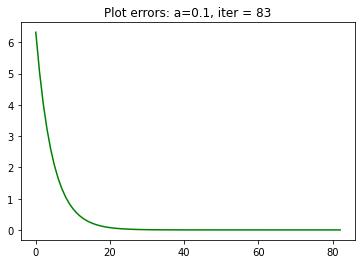

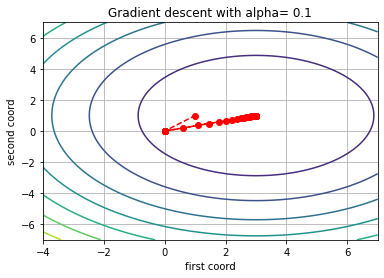

---------------------------------------------------------------- 

Exit for k_max passed with b = False 

Result for a=1: [0. 0.] 



<ipython-input-93-ad684e7933fb>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.title("Plot errors: " + title)


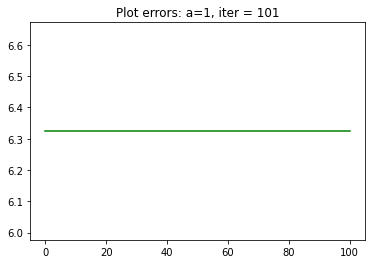

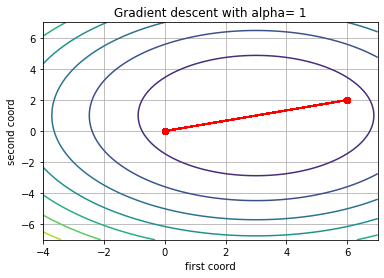

---------------------------------------------------------------- 

Exit for k_max passed with b = False 

Result for a=0.001: [0.54429959 0.1814332 ] 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


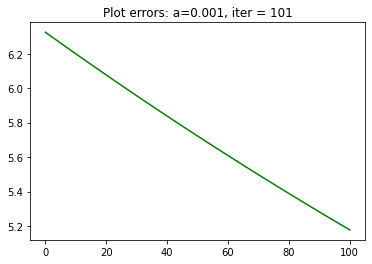

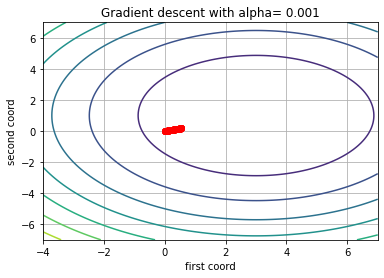

---------------------------------------------------------------- 

Exit for k_max passed with b = True 

Result backtracking: [2.99999524 0.99999841] 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


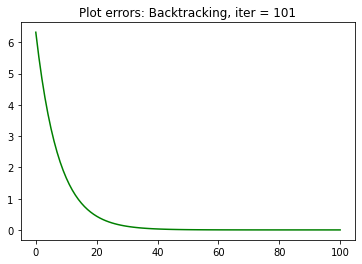

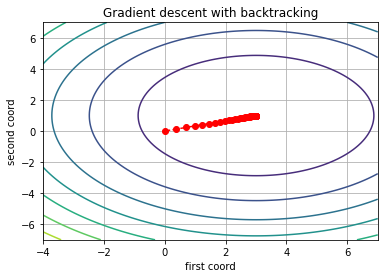



---------------------------------------------------------------- 



In [95]:
def f1(x):
  return (x[0] - 3)**2 + (x[1] - 1)**2

def grad_f1(x):
  return np.array([2*(x[0] - 3), 2*(x[1] - 1)])

x0 = np.zeros((n, ))
params1 = [-4, 7, 100]
params2 = [-7, 7, 100]

for a in alpha:
  x, k, f_val, grads, err = gradient_descent(f1, grad_f1, x0, kmax, tolf, tolx, a, False)
  print(f"Result for a={a}: {x[k]} \n")
  plot_res(range(k+1), err, f"a={a}, iter = {k+1}")
  print("\n")
  plot_gradient_descent(x, f1, "Gradient descent with alpha= " + str(a), params1, params2)
  print("---------------------------------------------------------------- \n")

xb, kb, f_valb, gradsb, errb = gradient_descent(f1, grad_f1, x0, kmax, tolf, tolx, alpha, True)

print(f"Result backtracking: {xb[kb]} \n")
plot_res(range(kb+1), errb, f"Backtracking, iter = {kb+1}")
print("\n")
plot_gradient_descent(xb, f1, "Gradient descent with backtracking", params1, params2)
print("\n")

print("---------------------------------------------------------------- \n")

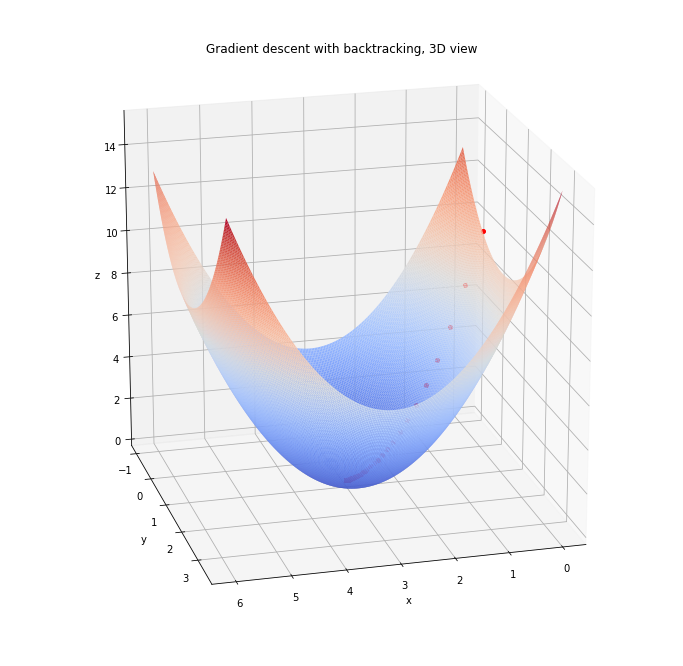

In [96]:
params1 = [ 0, 6, 200]
params2 = [-1, 3.5, 200]
plot_3D(xb, f1, "Gradient descent with backtracking, 3D view", params1, params2)

<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


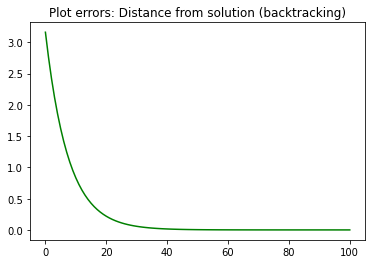

In [97]:
x_true_f1 = [3,1]
distances = []
for i in range(kb+1):
  err = np.linalg.norm(xb[i] - x_true_f1, 2)
  distances.append(err)

plot_res(range(kb+1), distances, f"Distance from solution (backtracking)")

Exit for k_max passed with b = False 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


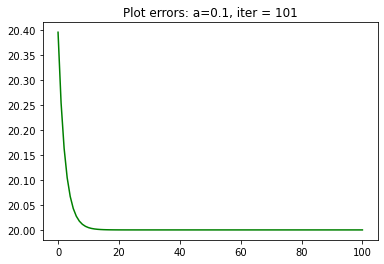

Result for a=0.1: [0. 2.] 





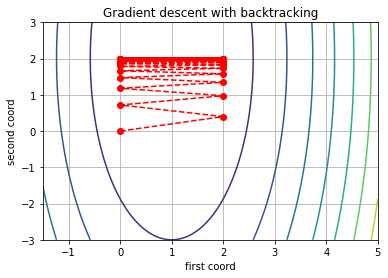



---------------------------------------------------------------- 

Exit for k_max passed with b = False 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


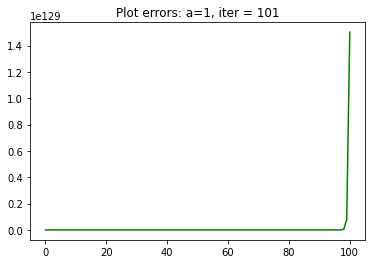

Result for a=1: [-7.50516242e+127  0.00000000e+000] 





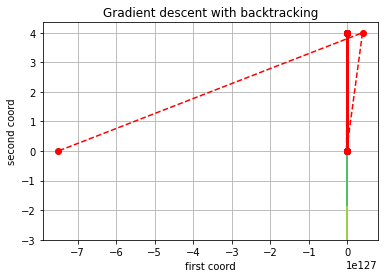



---------------------------------------------------------------- 

Exit for k_max passed with b = False 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


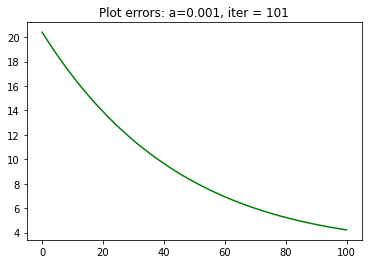

Result for a=0.001: [0.86738044 0.36286639] 





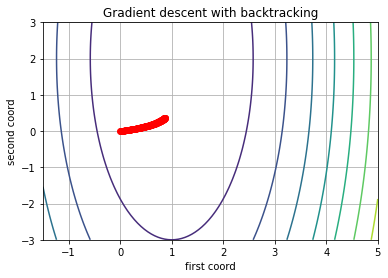



---------------------------------------------------------------- 

Exit for k_max passed with b = True 

Result backtracking: [1.         1.99999283] 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


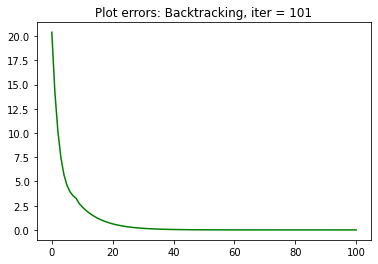

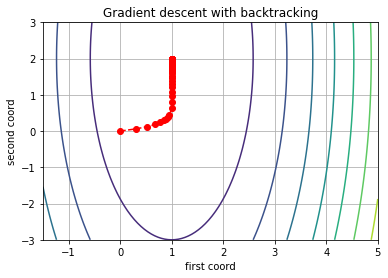



---------------------------------------------------------------- 



In [98]:
def f2(x):
    return 10*(x[0]-1)**2 + (x[1]-2)**2

def grad_f2(x):
    return np.array([20*(x[0]-1), 2*(x[1]-2)])

x0 = np.zeros((n, ))
params1 = [-1.5, 5, 100]
params2 = [-3, 3, 100]

for a in alpha:
  x, k, f_val, grads, err = gradient_descent(f2, grad_f2, x0, kmax, tolf, tolx, a, False)
  plot_res(range(k+1), err, f"a={a}, iter = {k+1}")
  print(f"Result for a={a}: {x[k]} \n")
  print("\n")
  plot_gradient_descent(x, f2, "Gradient descent with backtracking", params1, params2)
  print("\n")
  print("---------------------------------------------------------------- \n")

xb, kb, f_valb, gradsb, errb = gradient_descent(f2, grad_f2, x0, kmax, tolf, tolx, alpha, True)


print(f"Result backtracking: {xb[kb]} \n")
plot_res(range(kb+1), errb, f"Backtracking, iter = {kb+1}")
print("\n")
plot_gradient_descent(xb, f2, "Gradient descent with backtracking", params1, params2)
print("\n")

print("---------------------------------------------------------------- \n")

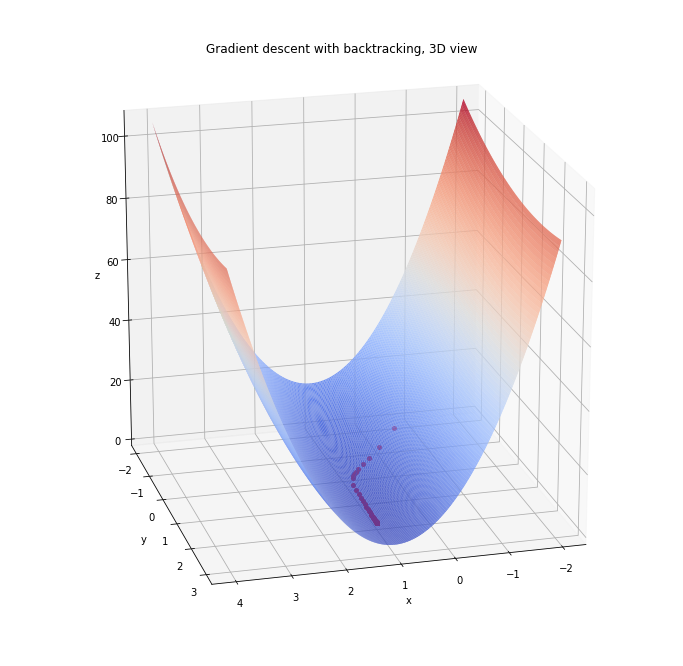

In [99]:
params1 = [ -2, 4, 200]
params2 = [-2, 3, 200]
plot_3D(xb, f2, "Gradient descent with backtracking, 3D view", params1, params2)

<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


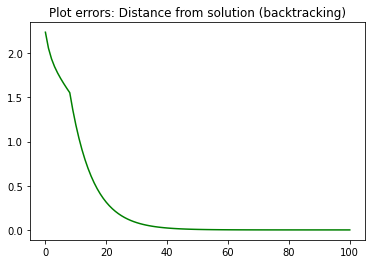

In [100]:
x_true_f2 = [1,2]
distances = []
for i in range(kb+1):
  err = np.linalg.norm(xb[i] - x_true_f2, 2)
  distances.append(err)

plot_res(range(kb+1), distances, f"Distance from solution (backtracking)")

In [101]:
alpha_standard = 0.01 # new alpha, I have already seen the behavior with small or big alpha 

Exit for k_max passed with b = False 

Exit due to tolx with b = True 

Result first: [0.63396766] 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


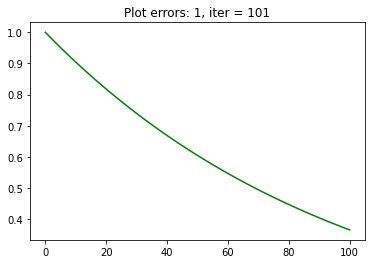



Result second: [0.99999998] 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


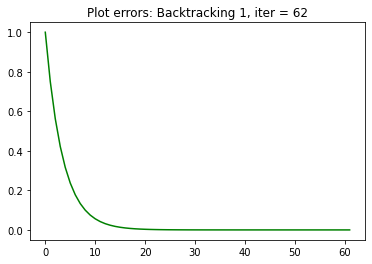

---------------------------------------------------------------- 

Exit for k_max passed with b = False 

Exit for k_max passed with b = True 

Result first: [0.87494211 0.91333192 0.96730598 1.04346111 1.08344022] 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


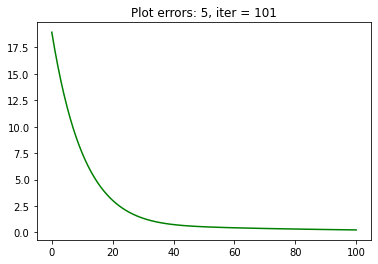

<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()




Result second: [0.98023185 0.99518311 1.01017824 1.01588858 0.99464791] 



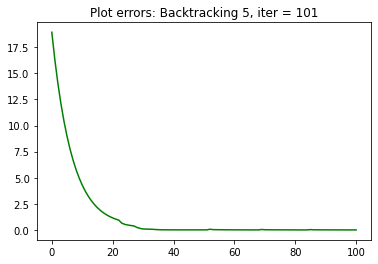

---------------------------------------------------------------- 

Exit for k_max passed with b = False 

Exit for k_max passed with b = True 

Result first: [0.91451521 0.93084711 0.9495058  0.97074569 0.99470322 1.02114135
 1.04873318 1.07279626 1.07659429 0.95698506] 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


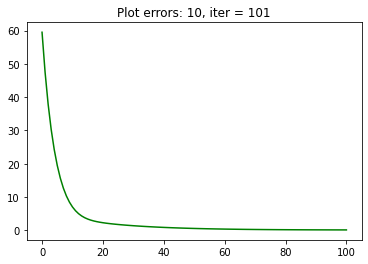



Result second: [0.98366379 0.99047379 0.99737787 1.00397192 1.0095392  1.01283063
 1.01171709 1.00285787 0.98320687 1.00298099] 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


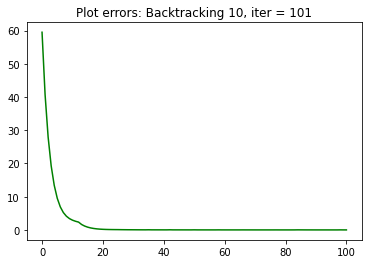

---------------------------------------------------------------- 



In [102]:
import random

def f3(x):
    return ((np.linalg.norm(A@x - b) ** 2)/2)

def grad_f3(x):
    return A.T@(A@x - b)

n = [1, 5, 10]

for i in range(len(n)):
  A = np.vander(np.linspace(0, 1, n[i]))
  x_true = np.ones(n[i])
  b = A @ x_true

  x0 = np.zeros((n[i], ))

  x, k, f_val, grads, err = gradient_descent(f3, grad_f3, x0, kmax, tolf, tolx, alpha_standard, False)

  xb, kb, f_valb, gradsb, errb = gradient_descent(f3, grad_f3, x0, kmax, tolf, tolx, alpha, True)

  print(f"Result first: {x[k]} \n")
  plot_res(range(k+1), err, f"{n[i]}, iter = {k+1}")

  print("\n")

  print(f"Result second: {xb[kb]} \n")
  plot_res(range(kb+1), errb, f"Backtracking {n[i]}, iter = {kb+1}")

  print("---------------------------------------------------------------- \n")



--------------------------n[0]------------------------------------ 



-------------------------lam[0]----------------------------------- 

Exit for k_max passed with b = False 

Exit for k_max passed with b = True 

Result first: [0.79664316 0.83491012 0.89022261 0.97285115 1.06702919] 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


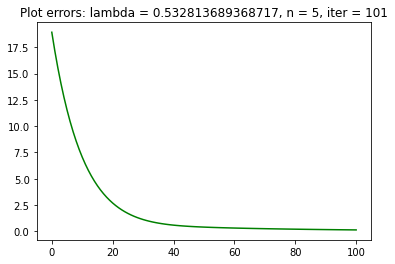

<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()




Result second: [0.84029502 0.87543649 0.92478081 0.99452143 1.0487058 ] 



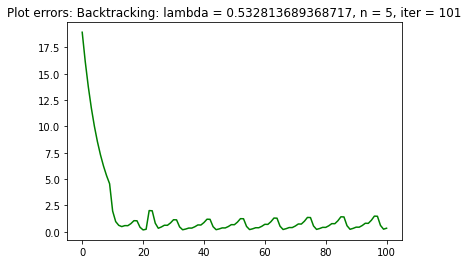



-------------------------lam[1]----------------------------------- 

Exit for k_max passed with b = False 

Exit for k_max passed with b = True 

Result first: [0.79664316 0.83491012 0.89022261 0.97285115 1.06702919] 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


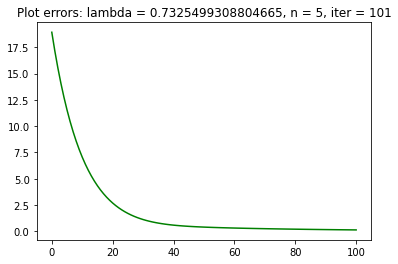

<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()




Result second: [0.84029502 0.87543649 0.92478081 0.99452143 1.0487058 ] 



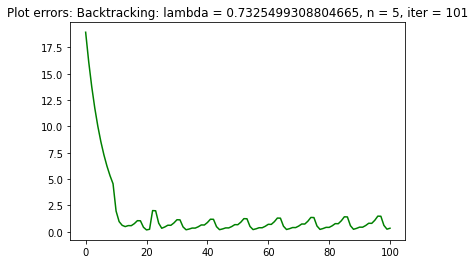



-------------------------lam[2]----------------------------------- 

Exit for k_max passed with b = False 

Exit for k_max passed with b = True 

Result first: [0.79664316 0.83491012 0.89022261 0.97285115 1.06702919] 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


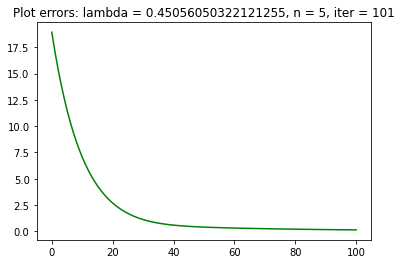



Result second: [0.84029502 0.87543649 0.92478081 0.99452143 1.0487058 ] 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


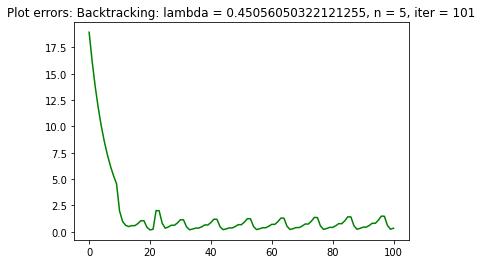



--------------------------n[1]------------------------------------ 



-------------------------lam[0]----------------------------------- 

Exit for k_max passed with b = False 

Exit for k_max passed with b = True 

Result first: [0.84095831 0.85797807 0.87770791 0.90061797 0.92720933 0.95789476
 0.99259168 1.02926001 1.05774288 0.99961589] 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


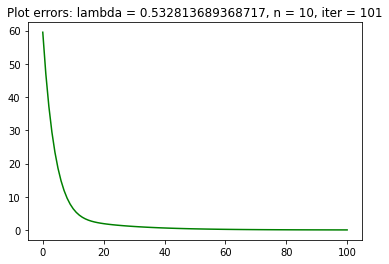



Result second: [0.86626707 0.88222668 0.90060934 0.92178941 0.94614058 0.97392216
 1.00494029 1.03747335 1.06431714 1.04670772] 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


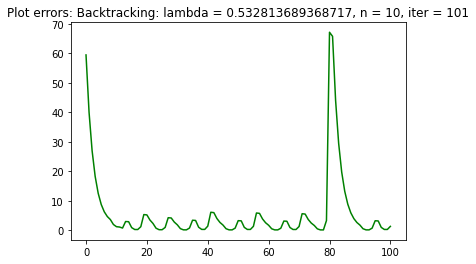



-------------------------lam[1]----------------------------------- 

Exit for k_max passed with b = False 

Exit for k_max passed with b = True 

Result first: [0.84095831 0.85797807 0.87770791 0.90061797 0.92720933 0.95789476
 0.99259168 1.02926001 1.05774288 0.99961589] 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


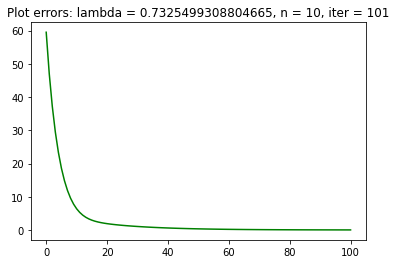

<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()




Result second: [0.86626707 0.88222668 0.90060934 0.92178941 0.94614058 0.97392216
 1.00494029 1.03747335 1.06431714 1.04670772] 



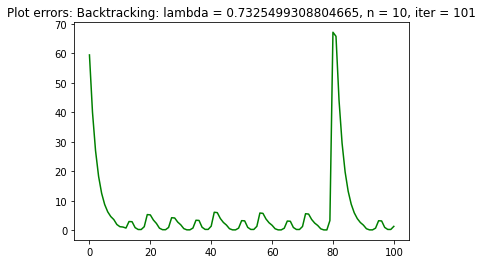



-------------------------lam[2]----------------------------------- 

Exit for k_max passed with b = False 

Exit for k_max passed with b = True 

Result first: [0.84095831 0.85797807 0.87770791 0.90061797 0.92720933 0.95789476
 0.99259168 1.02926001 1.05774288 0.99961589] 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


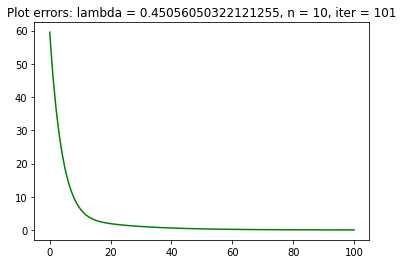

<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()




Result second: [0.86626707 0.88222668 0.90060934 0.92178941 0.94614058 0.97392216
 1.00494029 1.03747335 1.06431714 1.04670772] 



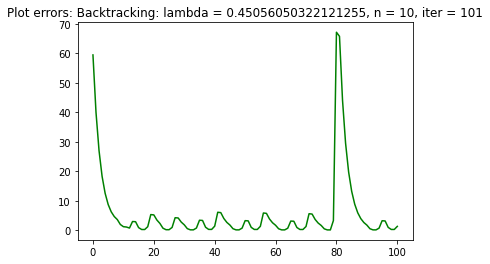

In [103]:
lam_s = []
for i in range(3):
  lam_s.append(random.random())

def f4(x):
    return ((np.linalg.norm((A@x) - b) ** 2)/2) + ((lam * np.linalg.norm(x))/2)

def grad_f4(x):
    return A.T@((A@x) - b) + lam*x

n = np.arange(5,15,5)

for i in range(len(n)):
  print("\n")
  print(f"--------------------------n[{i}]------------------------------------ \n")
  for j in range(len(lam_s)):
    print("\n")
    print(f"-------------------------lam[{j}]----------------------------------- \n")
    lam = lam_s[i]
    A = np.vander(np.linspace(0, 1, n[i]))
    x_true = np.ones(n[i])
    b = A @ x_true

    x0 = np.zeros((n[i], ))

    x, k, f_val, grads, err = gradient_descent(f4, grad_f4, x0, kmax, tolf, tolx, alpha_standard, False)

    xb, kb, f_valb, gradsb, errb = gradient_descent(f4, grad_f4, x0, kmax, tolf, tolx, alpha, True)

    print(f"Result first: {x[k]} \n")
    plot_res(range(k+1), err, f"lambda = {lam_s[j]}, n = {n[i]}, iter = {k+1}")

    print("\n")

    print(f"Result second: {xb[kb]} \n")
    plot_res(range(kb+1), errb, f"Backtracking: lambda = {lam_s[j]}, n = {n[i]}, iter = {kb+1}")
    

Exit for k_max passed with b = False 

Exit due to tolx with b = True 



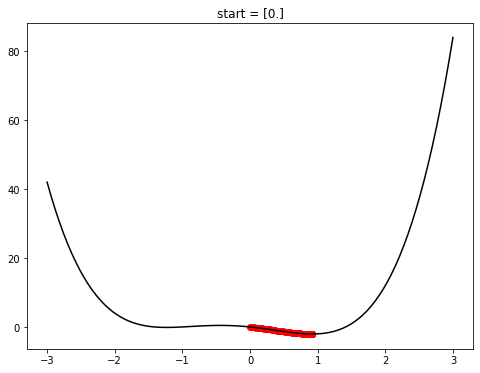

Result first: [0.92218805] 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


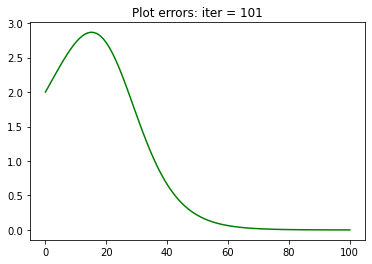

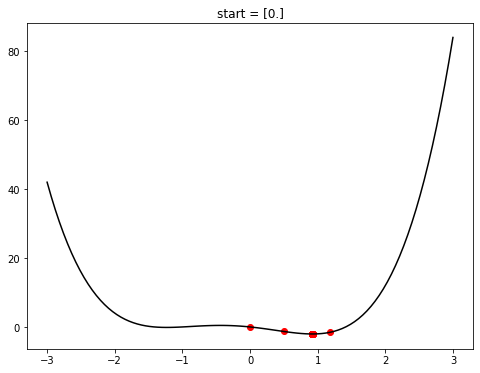

Result second: [0.92222483] 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


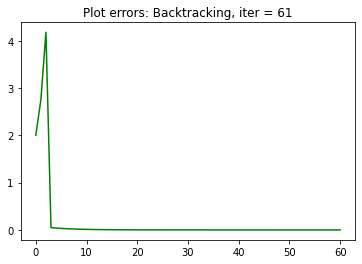

---------------------------------------------------------------- 



In [104]:
n = 1

def f5(x):
  return x[0]**4 + x[0]**3 - 2*x[0]**2 - 2*x[0]

def grad_f5(x):
  return 4*x[0]**3 + 3*x[0]**2 - 4*x[0] - 2

x0 = np.zeros((n, ))

x, k, f_val, grads, err = gradient_descent(f5, grad_f5, x0, kmax, tolf, tolx, alpha_standard, False)

xb, kb, f_valb, gradsb, errb = gradient_descent(f5, grad_f5, x0, kmax, tolf, tolx, alpha, True)

plot_f5(x, f_val, f5, f"start = {x0}")
print(f"Result first: {x[k]} \n")
plot_res(range(k+1), err, f"iter = {k+1}")

print("\n")

plot_f5(xb, f_valb, f5, f"start = {x0}")
print(f"Result second: {xb[kb]} \n")
plot_res(range(kb+1), errb, f"Backtracking, iter = {kb+1}")


print("---------------------------------------------------------------- \n") 

Exit for k_max passed with b = False 

Exit for k_max passed with b = True 



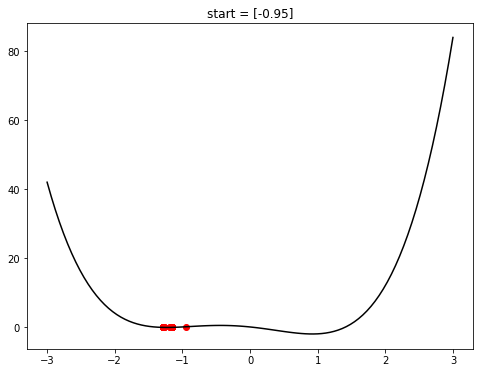

Result first: [-1.15849137] 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


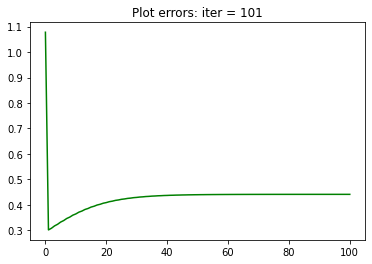

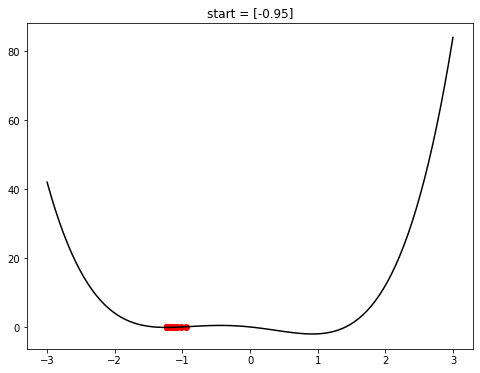

Result second: [-1.23223934] 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


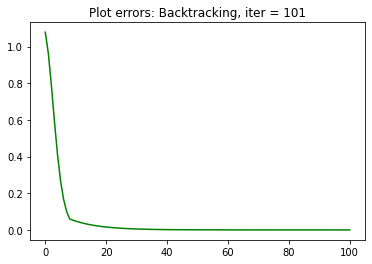

---------------------------------------------------------------- 



In [105]:
# trying different x0 for f5
x0 = np.array([-0.95])
kmax = 100
alpha = 0.3

x, k, f_val, grads, err = gradient_descent(f5, grad_f5, x0, kmax, tolf, tolx, alpha, False)

xb, kb, f_valb, gradsb, errb = gradient_descent(f5, grad_f5, x0, kmax, tolf, tolx, alpha, True)

plot_f5(x, f_val, f5, f"start = {x0}")
print(f"Result first: {x[k]} \n")
plot_res(range(k+1), err, f"iter = {k+1}")

print("\n")

plot_f5(xb, f_valb, f5, f"start = {x0}")
print(f"Result second: {xb[kb]} \n")
plot_res(range(kb+1), errb, f"Backtracking, iter = {kb+1}")


print("---------------------------------------------------------------- \n") 

Exit for k_max passed with b = False 

Exit due to tolf with b = True 



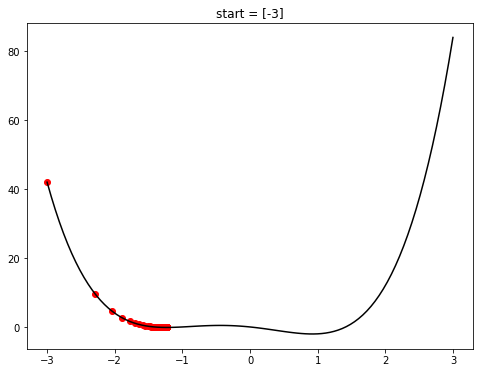

Result first: [-1.23223986] 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


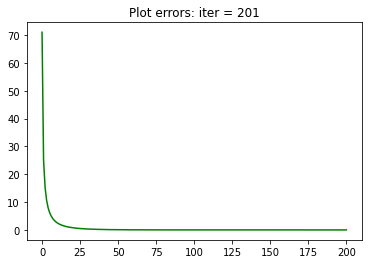

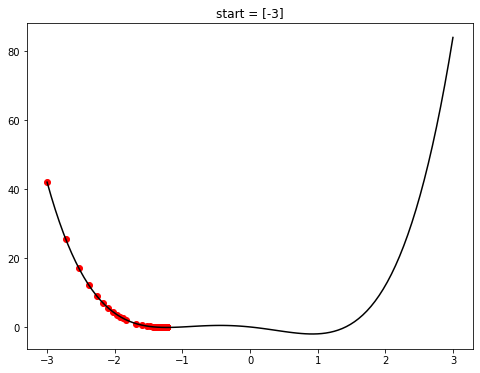

Result second: [-1.23223972] 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


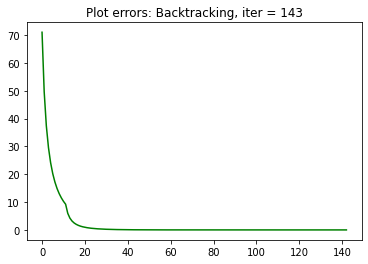

---------------------------------------------------------------- 



In [106]:
# trying different x0 for f5
x0 = np.array([-3])
kmax = 200
alpha = 0.01

x, k, f_val, grads, err = gradient_descent(f5, grad_f5, x0, kmax, tolf, tolx, alpha, False)

xb, kb, f_valb, gradsb, errb = gradient_descent(f5, grad_f5, x0, kmax, tolf, tolx, alpha, True)

plot_f5(x, f_val, f5, f"start = {x0}")
print(f"Result first: {x[k]} \n")
plot_res(range(k+1), err, f"iter = {k+1}")

print("\n")

plot_f5(xb, f_valb, f5, f"start = {x0}")
print(f"Result second: {xb[kb]} \n")
plot_res(range(kb+1), errb, f"Backtracking, iter = {kb+1}")


print("---------------------------------------------------------------- \n") 

Exit for k_max passed with b = False 

Exit due to tolx with b = True 



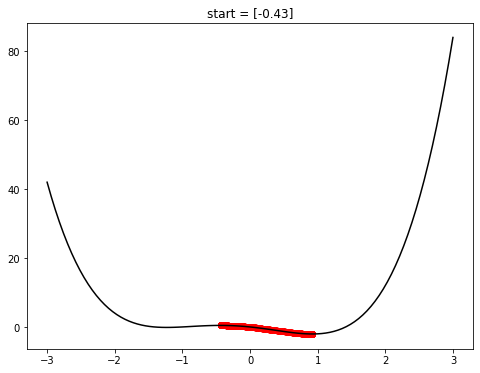

Result first: [0.92221792] 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


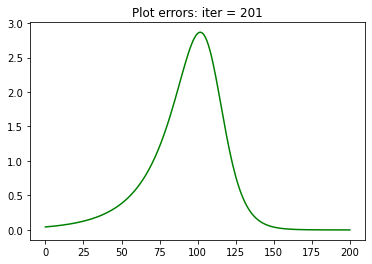

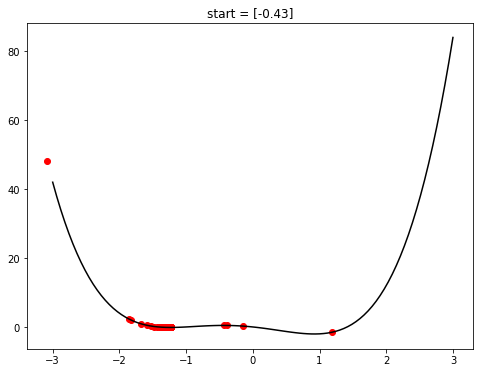

Result second: [-1.23223966] 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


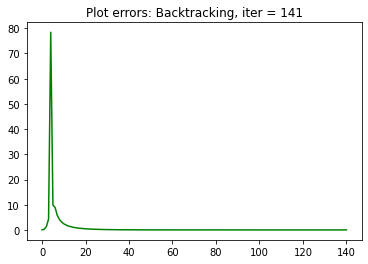

---------------------------------------------------------------- 



In [107]:
# trying different x0 for f5
x0 = np.array([-0.43])
kmax = 200
alpha = 0.01

x, k, f_val, grads, err = gradient_descent(f5, grad_f5, x0, kmax, tolf, tolx, alpha, False)

xb, kb, f_valb, gradsb, errb = gradient_descent(f5, grad_f5, x0, kmax, tolf, tolx, alpha, True)

plot_f5(x, f_val, f5, f"start = {x0}")
print(f"Result first: {x[k]} \n")
plot_res(range(k+1), err, f"iter = {k+1}")

print("\n")

plot_f5(xb, f_valb, f5, f"start = {x0}")
print(f"Result second: {xb[kb]} \n")
plot_res(range(kb+1), errb, f"Backtracking, iter = {kb+1}")


print("---------------------------------------------------------------- \n") 

### SGD

In [108]:
data = pd.read_csv('data.csv') 

print(data.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [109]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

def f(w, xhat):
    return sigmoid(xhat.T @ w)

def grad_f(w, xhat):
    return (sigmoid(xhat.T @ w) * (1 - sigmoid(xhat.T @ w)) * xhat.T)

def MSE(f_w_x, y):
    return np.linalg.norm((f_w_x-y))**2

def grad_MSE(grad_f_w_x, f_w_x, y):
    return grad_f_w_x.T * (f_w_x - y)

def ell(w, X, Y):
    d, N = X.shape
    mse_sum = 0
    for i in range(0, N):
        mse_sum+=MSE(f(w, X[:, i]), Y[i])

    return mse_sum / N

def grad_ell(w, X, Y):
    d, N = X.shape

    grad_mse_sum = 0
    for i in range(0, N):
        grad_mse_sum += grad_MSE(np.array(grad_f(w, X[:, i])), f(w, X[:, i]), Y[i])

    return grad_mse_sum / N

In [110]:
def SGD(l, grad_l, w0, D, batch_size, n_epochs):
    X, Y = D
    d, N = X.shape

    Xhat = np.concatenate((np.ones((1,N)), X), axis=0) 

    n_batch_per_epoch = N // batch_size
    tot_batch = n_epochs * n_batch_per_epoch

    w_val = np.zeros((tot_batch + 1, d + 1))
    f_val = np.zeros((n_epochs + 1, ))
    grads = np.zeros((n_epochs + 1, d + 1))
    err = np.zeros((n_epochs + 1, ))
    
    w_val[0, :] = w0
    f_val[0] = l(w0, Xhat, Y)
    grads[0, :] = grad_l(w0, Xhat, Y)
    err[0] = np.linalg.norm(grads[0, :], 2)
        
    alpha = 0.001

    i = 1

    for epoch in range(1, n_epochs+1):
        print(f"epoch: {epoch}")

        x_copy = X
        y_copy = Y

        batch_idx = np.arange(N)
        np.random.shuffle(batch_idx)    
        
        for k in range(n_batch_per_epoch):
            batch = batch_idx[k * batch_size : (k + 1) * batch_size]            

            Mx = Xhat[:, batch]
            My = y_copy[batch]

            w = w0 - alpha * grad_l(w0, Mx, My)
            w0 = w

            w_val[i] = w
            i = i + 1

        f_val[epoch] = l(w, Xhat, y_copy)
        grads[epoch] = grad_l(w, Xhat, y_copy)
        err[epoch] = np.linalg.norm(grad_l(w, Xhat, y_copy))
    
    return w_val, f_val, grads, err


In [111]:
data = np.array(data)

print(data.shape)

X = data[:, 1:].T

Y = data[:, 0]

print("")
print(X.shape, Y.shape)

def split_data(X, Y, Ntrain):
    d, N = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]
    
    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return Xtrain, Ytrain, Xtest, Ytest

(42000, 785)

(784, 42000) (42000,)


In [112]:
number1 = 1 #@param
number2 = 2 #@param

In [113]:
def dataset_chosen_digits(n1, n2):

  chosen_digits = [n1, n2]

  I1 = (Y==chosen_digits[0])
  I2 = (Y==chosen_digits[1])

  X1 = X[:, I1]
  X2 = X[:, I2]

  Y1 = Y[I1]
  Y2 = Y[I2]

  X_chosen = np.concatenate((X1, X2), axis=1)
  Y_chosen = np.concatenate((Y1, Y2))

  return X_chosen, Y_chosen

In [114]:
X_chosen, Y_chosen = dataset_chosen_digits(number1, number2)

d, N = X_chosen.shape

N_train = int(0.75 * N)

Y_chosen[Y_chosen == number1] = 0
Y_chosen[Y_chosen == number2] = 1

X_train, Y_train, X_test, Y_test = split_data(X_chosen, Y_chosen, N_train)

D = (X_train, Y_train)

In [115]:
w0 = np.random.normal(0, 0.1, d+1)
batch_size = 15
n_epochs = 50

w, f_vals, grad_vals, err_vals = SGD(ell, grad_ell, w0, D, batch_size, n_epochs)

epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15
epoch: 16
epoch: 17
epoch: 18
epoch: 19
epoch: 20
epoch: 21
epoch: 22
epoch: 23
epoch: 24
epoch: 25
epoch: 26
epoch: 27
epoch: 28
epoch: 29
epoch: 30
epoch: 31
epoch: 32
epoch: 33
epoch: 34
epoch: 35
epoch: 36
epoch: 37
epoch: 38
epoch: 39
epoch: 40
epoch: 41
epoch: 42
epoch: 43
epoch: 44
epoch: 45
epoch: 46
epoch: 47
epoch: 48
epoch: 49
epoch: 50


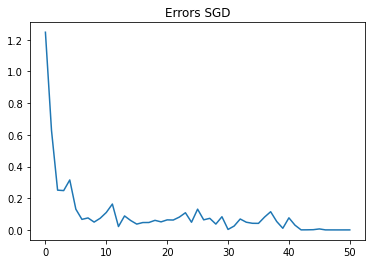

In [116]:
x_plot = np.arange(n_epochs + 1)
plt.plot(x_plot, err_vals)
plt.title("Errors SGD")
plt.show()

In [117]:
w0 = np.random.normal(0, 0.1, d+1)
batch_size = 10
n_epochs = 3

w, f_vals, grad_vals, err_vals = SGD(ell, grad_ell, w0, D, batch_size, n_epochs)

epoch: 1
epoch: 2
epoch: 3


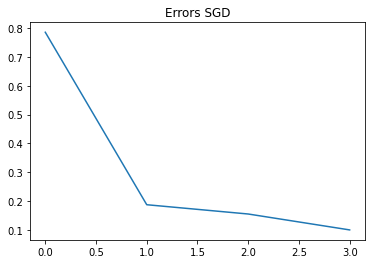

In [118]:
x_plot = np.arange(n_epochs+1)
plt.plot(x_plot, err_vals)
plt.title("Errors SGD")
plt.show()

In [119]:
def accuracy(prediction, Y):
    total = 0
    for i in range(len(Y)):
        if (int(prediction[i]) == Y[i]):
            total+=1
    return total, total/len(Y)

def predict(weight, X, threshold = 0.5):
    N = X.shape[1]
    predicted = np.zeros(N)
    for i in range(N):
        res = f(weight, X[:, i])
        if (res >= threshold):
            predicted[i] = 1
        else:
            predicted[i] = 0

    return predicted

def log_class(X, Y, weight):
  d, N = X.shape
  Xhat = np.concatenate((np.ones((1,N)), X), axis=0)

  prediction = predict(weight, Xhat)

  total, acc = accuracy(prediction, Y)

  return prediction, total, acc

In [120]:
number3 = 3 #@param
number4 = 8 #@param

epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6


<ipython-input-109-6b43614449e6>:2: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15


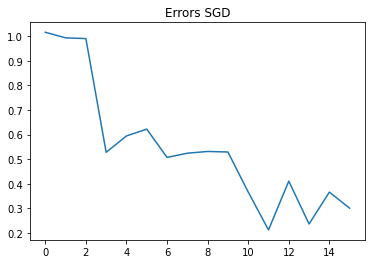

In [121]:
X_chosen, Y_chosen = dataset_chosen_digits(number3, number4)

d, N = X_chosen.shape

N_train = int(0.3 * N)

Y_chosen[Y_chosen == number3] = 0
Y_chosen[Y_chosen == number4] = 1

X_train, Y_train, X_test, Y_test = split_data(X_chosen, Y_chosen, N_train)

D = (X_train, Y_train)

w0 = np.random.normal(0, 0.1, d+1)
batch_size = 20
n_epochs = 15

w, f_vals, grad_vals, err_vals = SGD(ell, grad_ell, w0, D, batch_size, n_epochs)

x_plot = np.arange(n_epochs+1)
plt.plot(x_plot, err_vals)
plt.title("Errors SGD")
plt.show()

In [122]:
weight = w[len(w)-1]
Xt = X_train.copy()
Yt = Y_train.copy()

prediction, total, acc = log_class(Xt, Yt, weight)

print(f"Matches on Train Set: {int(total)}")
print(f"Total entries on Train Set: {int(Yt.shape[0])}")
print(f"Accuracy on Train Set: {round(acc*100, 2)}%")

print("\n")
Counter(prediction)

Matches on Train Set: 2191
Total entries on Train Set: 2524
Accuracy on Train Set: 86.81%




<ipython-input-109-6b43614449e6>:2: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


Counter({1.0: 1135, 0.0: 1389})

In [123]:
Xt = X_test.copy()
Yt = Y_test.copy()

prediction, total, acc = log_class(Xt, Yt, weight)

print(f"Matches on Test Set: {int(total)}")
print(f"Total entries on Test Set: {int(Yt.shape[0])}")
print(f"Accuracy on Test Set: {round(acc*100, 2)}%")

print("\n")
Counter(prediction)

Matches on Test Set: 5078
Total entries on Test Set: 5890
Accuracy on Test Set: 86.21%




<ipython-input-109-6b43614449e6>:2: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


Counter({0.0: 3181, 1.0: 2709})

In [124]:
number5 = 7 #@param
number6 = 8 #@param

In [125]:
X_chosen, Y_chosen = dataset_chosen_digits(number5, number6)

d, N = X_chosen.shape

N_train = int(0.8 * N)

Y_chosen[Y_chosen == number5] = 0
Y_chosen[Y_chosen == number6] = 1

X_train, Y_train, X_test, Y_test = split_data(X_chosen, Y_chosen, N_train)

D = (X_train, Y_train)

w0 = np.random.normal(0, 0.1, d+1)
batch_size = 15
n_epochs = 50

w, f_vals, grad_vals, err_vals = SGD(ell, grad_ell, w0, D, batch_size, n_epochs)

epoch: 1


<ipython-input-109-6b43614449e6>:2: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15
epoch: 16
epoch: 17
epoch: 18
epoch: 19
epoch: 20
epoch: 21
epoch: 22
epoch: 23
epoch: 24
epoch: 25
epoch: 26
epoch: 27
epoch: 28
epoch: 29
epoch: 30
epoch: 31
epoch: 32
epoch: 33
epoch: 34
epoch: 35
epoch: 36
epoch: 37
epoch: 38
epoch: 39
epoch: 40
epoch: 41
epoch: 42
epoch: 43
epoch: 44
epoch: 45
epoch: 46
epoch: 47
epoch: 48
epoch: 49
epoch: 50


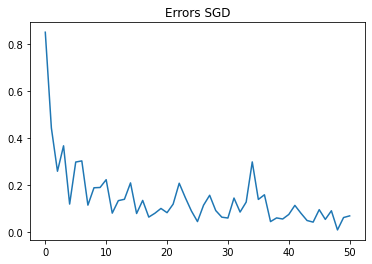

In [126]:
x_plot = np.arange(n_epochs+1)
plt.plot(x_plot, err_vals)
plt.title("Errors SGD")
plt.show()

In [127]:
weight = w[len(w)-1]
Xt = X_train.copy()
Yt = Y_train.copy()

prediction, total, acc = log_class(Xt, Yt, weight)

print(f"Matches on Train Set: {int(total)}")
print(f"Total entries on Train Set: {int(Yt.shape[0])}")
print(f"Accuracy on Train Set: {round(acc*100, 2)}%")

print("\n")
Counter(prediction)

Matches on Train Set: 6660
Total entries on Train Set: 6771
Accuracy on Train Set: 98.36%




<ipython-input-109-6b43614449e6>:2: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


Counter({0.0: 3506, 1.0: 3265})

In [128]:
Xt = X_test.copy()
Yt = Y_test.copy()

prediction, total, acc = log_class(Xt, Yt, weight)

print(f"Matches on Test Set: {int(total)}")
print(f"Total entries on Test Set: {int(Yt.shape[0])}")
print(f"Accuracy on Test Set: {round(acc*100, 2)}%")

print("\n")
Counter(prediction)

Matches on Test Set: 1649
Total entries on Test Set: 1693
Accuracy on Test Set: 97.4%




<ipython-input-109-6b43614449e6>:2: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


Counter({1.0: 819, 0.0: 874})

In [129]:
def gradient_descent_2(l, grad_l, w0, D, kmax, tolf, tolx, alpha):
    X, Y = D
    d, N = X.shape
    
    Xhat = np.concatenate((np.ones((1,N)), X), axis=0)

    k = 0
    w_vals = np.zeros((kmax+1, int(w0.shape[0])))
    f_val = np.zeros((kmax+1, ))
    grads = np.zeros((kmax+1, int(w0.shape[0])))
    err = np.zeros((kmax+1, ))

    w_vals[k] = w0
    f_val[k] = l(w0, Xhat, Y)
    grads[k, :] = grad_l(w0, Xhat, Y)
    err[k] = np.linalg.norm(grads[k], 2)
        
    w_vals[-1, :] = 1 

    while (k < kmax) and (err[k] > tolf * err[0]) and (np.linalg.norm(w_vals[k, :] - w_vals[k-1, :], 2) > tolx): 
        if k % 10 == 0: 
          print(f"iteration number : {k} ...")

        w_vals[k+1, :] = w_vals[k, :] - alpha * grad_l(w_vals[k, :], Xhat, Y)
        
        k = k+1
        f_val[k] = l(w_vals[k, :], Xhat, Y)
        grads[k, :] = grad_l(w_vals[k, :], Xhat, Y)
        err[k] = np.linalg.norm(grads[k, :], 2)
        
    f_val = f_val[:k+1]
    grads = grads[:k+1, :]
    err = err[:k+1]


    print("\n")
    if (k == kmax):
      print(f"Exit for k_max passed \n")
    elif (err[k] < tolf * err[0]):
      print(f"Exit due to tolf \n")
    elif (np.linalg.norm(w_vals[k, :] - w_vals[k-1, :], 2) < tolx):
      print(f"Exit due to tolx \n")
    
    return w_vals[k], k, f_val, grads, err

In [130]:
w0 = np.random.normal(0, 0.1, d+1)

w_gd, k, f_val, grads, err = gradient_descent_2(ell, grad_ell, w0, D, kmax, tolf, tolx, 0.1)


iteration number : 0 ...


<ipython-input-109-6b43614449e6>:2: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


iteration number : 10 ...
iteration number : 20 ...
iteration number : 30 ...
iteration number : 40 ...
iteration number : 50 ...
iteration number : 60 ...
iteration number : 70 ...
iteration number : 80 ...
iteration number : 90 ...
iteration number : 100 ...
iteration number : 110 ...
iteration number : 120 ...
iteration number : 130 ...
iteration number : 140 ...
iteration number : 150 ...
iteration number : 160 ...
iteration number : 170 ...
iteration number : 180 ...
iteration number : 190 ...


Exit for k_max passed 



<ipython-input-93-ad684e7933fb>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


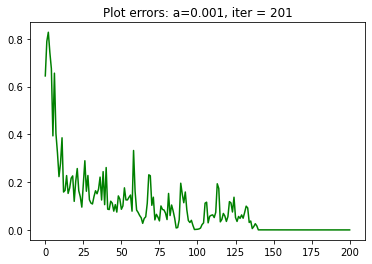



Matches on Train Set: 6626
Total entries on Train Set: 6771
Accuracy on Train Set: 97.86%




<ipython-input-109-6b43614449e6>:2: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


Counter({0.0: 3494, 1.0: 3277})

In [131]:
plot_res(range(k+1), err, f"a={a}, iter = {k+1}")
print("\n")

weight = w_gd
Xt = X_train.copy()
Yt = Y_train.copy()

prediction, total, acc = log_class(Xt, Yt, weight)

print(f"Matches on Train Set: {int(total)}")
print(f"Total entries on Train Set: {int(Yt.shape[0])}")
print(f"Accuracy on Train Set: {round(acc*100, 2)}%")

print("\n")
Counter(prediction)

In [132]:
Xt = X_test.copy()
Yt = Y_test.copy()

prediction, total, acc = log_class(Xt, Yt, weight)

print(f"Matches on Test Set: {int(total)}")
print(f"Total entries on Test Set: {int(Yt.shape[0])}")
print(f"Accuracy on Test Set: {round(acc*100, 2)}%")

print("\n")
Counter(prediction)

Matches on Test Set: 1645
Total entries on Test Set: 1693
Accuracy on Test Set: 97.16%




<ipython-input-109-6b43614449e6>:2: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


Counter({1.0: 819, 0.0: 874})